# Stochastic Simulation Assignment 2

Created by Maarten Stork, Paul Jungnickel and Lucas Keijzer.

The code below follows the order of the assignment, and recreates the experiments done in the paper.

In [1]:
# Imports

import simpy
import queue
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

from stochasticQueueing import *

## 2) Server Numbers

In [2]:
def M_M_n_simulation(system_load, server_count, sim_duration, seed=42, queue_type='FIFO'):
    """
    Simulates an M/M/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is 42).
    - queue_type: Type of queue (default is 'FIFO').

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    # Set arrival and service rates
    arrival_rate = server_count
    service_rate = 1 / system_load

    arrival_dist = lambda: rand.exponential(1 / arrival_rate)
    service_dist = lambda: rand.exponential(1 / service_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(
        arrival_dist, service_dist, server_count, queue_type=queue_type, sim_duration=sim_duration, seed=seed
    )
    return sim.results()

## plots for $\rho$

1 9.445273799906728
2 5.818863542882133
4 11.506997412114469
8 8.66084096322714
16 1.994895546163684


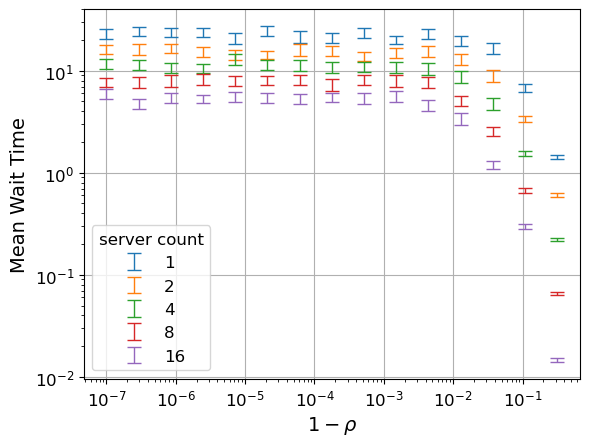

In [ ]:
# system load errorbar

server_counts = [1, 2, 4, 8, 16]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)
mean_wait_time = np.zeros_like(system_loads)
std_wait_time = np.zeros_like(system_loads)
for server_count in server_counts:
    for i, system_load in enumerate(system_loads):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, 1000, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    # plt.plot(1 - system_loads, mean_wait_time, label=f'{server_count}')
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(1 - system_loads, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='server count', title_fontsize=12, fontsize=12)


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

server_counts = [1, 2, 4, 8, 16]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

waiting_times = {n: [] for n in server_counts}

for server_count in server_counts:
    for i, system_load in enumerate(system_loads):
        wait_times = []
        for j in range(num_runs):
            res = M_M_n_simulation(system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1))
            wait_times.append(res['Average Wait Time'])
        waiting_times[server_count].extend(wait_times)

print("Mann-Whitney U-tests Results:")
for i, n1 in enumerate(server_counts):
    for j, n2 in enumerate(server_counts):
        if j > i:  # Compare each pair of server counts
            u_stat, p_val = mannwhitneyu(waiting_times[n1], waiting_times[n2], alternative='two-sided')
            print(f"Server Count {n1} vs {n2}: U-statistic = {u_stat:.4f}, p-value = {p_val:.4e}")

## Plots for Duration

In [ ]:
# duration - error bars

server_counts = [1, 2, 4]
num_runs = 1
rand.seed(42)
system_load = 0.99
max_duration = np.logspace(1, 7, 15)
mean_wait_time = np.zeros_like(max_duration)
std_wait_time = np.zeros_like(max_duration)
for server_count in server_counts:
    for i, duration in enumerate(max_duration):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, duration, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(max_duration, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'simulation duration')
plt.ylabel('mean wait time')
plt.legend(title='server count')

## 3) FIFO & SFJ


In [ ]:
server_counts = [1]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

for queue_type in ['FIFO', 'SJF']:
    for server_count in server_counts:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        for i, system_load in enumerate(system_loads):
            wait_times = np.zeros(num_runs)
            for j in range(num_runs):
                res = M_M_n_simulation(
                    system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1), queue_type=queue_type
                )
                wait_times[j] = res['Average Wait Time']

            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)
        plt.errorbar(
            1 - system_loads,
            mean_wait_time,
            std_wait_time,
            linestyle='',
            label=f'{queue_type}',
            capsize=5,
            elinewidth=1,
        )

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Queue Type', title_fontsize=12, fontsize=12)
plt.show()


## 4) Different Service Rate Distributions

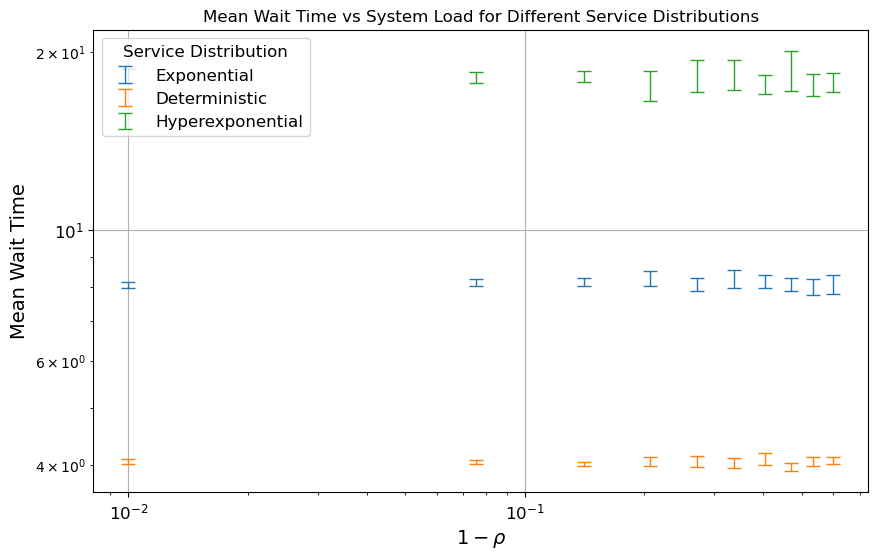


All Data Points for Waiting Times:
Exponential Waiting Times: [7.944190759031901, 8.656830170904636, 7.847404202735091, 7.756177180324771, 6.687198072929113, 9.154674050953775, 7.343650554423029, 7.392782042679671, 8.702967194605963, 8.07011783739716, 7.397899863003307, 8.253403477461031, 7.560230553670509, 7.632132611673842, 8.537851697224841, 8.556888414462854, 8.277941495022034, 9.430405324062006, 7.399981968341159, 8.953381178803516, 8.199587802431273, 7.706324103486421, 8.346043689847988, 7.787995085844696, 8.513074082203186, 8.388592848495518, 7.501200152070372, 8.572918082006437, 8.614544730670298, 7.462063215993761, 7.250109609263061, 7.2706449920362175, 8.333796874973306, 7.6521074852244215, 9.61974190246204, 8.135186092100835, 7.5509003848221425, 7.820785639958431, 7.600026193272119, 7.6887221488866695, 7.36282734387303, 8.495514421495736, 8.626441142830933, 8.441000889445377, 7.847889243791696, 8.821604786341341, 7.3708066690594265, 8.297879047984724, 7.71561850920579, 8.31

In [ ]:
def M_X_n_simulation(system_load, server_count, sim_duration, seed=None, service_dist=None):
    """
    Simulates an M/X/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is None).
    - service_dist: Custom service distribution (default is exponential).

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    if seed is not None:
        rand.seed(seed)

    # Set arrival rate and job completion rate
    arrival_rate = server_count
    job_completion_rate = 1 / system_load
    
    arrival_dist = lambda: rand.exponential(1 / arrival_rate)

    # Use default exponential service distribution if none is provided
    if service_dist is None:
        service_dist = lambda: rand.exponential(1 / job_completion_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(arrival_dist, service_dist, server_count, sim_duration=sim_duration, seed=seed)
    
    return sim.results()

def run_simulations_varying_rho_service_distributions():
    """
    Runs simulations for different service distributions with varying system load (rho).

    Returns:
    - A plot showing mean waiting times with confidence intervals for each service distribution.
    - Prints summary statistics for waiting times.
    """
    service_distributions = ['exponential', 'deterministic', 'hyperexponential']
    num_runs = 20
    system_loads = np.linspace(0.4, 0.99, 10)
    durations = 100000 * np.ones_like(system_loads)
    durations[7:] *= 5
    
    rand.seed(42)
    plt.figure(figsize=(10, 6))
    
    waiting_times = {service_type: [] for service_type in service_distributions}
    
    for service_type in service_distributions:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        
        # Loop over different system loads (rho values)
        for i, system_load in enumerate(system_loads):
            sim_duration = durations[i]
            wait_times = np.zeros(num_runs)
            
            # Run multiple simulations to collect data for statistical analysis
            for j in range(num_runs):
                seed = rand.randint(0, 2**31 - 1)
                
                # Define service distribution based on type
                if service_type == 'exponential':
                    service_dist = lambda: rand.exponential(1 / (1 / 0.9))
                elif service_type == 'deterministic':
                    service_dist = lambda: 1 / (1 / 0.9)
                elif service_type == 'hyperexponential':
                    def service_dist():
                        if rand.rand() < 0.5:
                            return rand.exponential(1.8)
                        else:
                            return rand.exponential(0.9)
                else:
                    raise ValueError("Unsupported service time distribution")
                
                # Run the simulation and record the average waiting time
                res = M_X_n_simulation(system_load, 1, sim_duration, seed=seed, service_dist=service_dist)
                wait_times[j] = res['Average Wait Time']
            
            # Store waiting times for statistical analysis
            waiting_times[service_type].extend(wait_times)
            
            # Calculate mean and standard deviation of waiting times for the current system load
            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)
        
        # Plotting mean waiting time with confidence intervals for the current service distribution
        plt.errorbar(system_loads, mean_wait_time, 
                    yerr=1.96 * std_wait_time / np.sqrt(num_runs), 
                    linestyle='', label=f'{service_type.capitalize()}', capsize=5, elinewidth=1)

    # Configure plot appearance
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\rho$', fontsize=14)  # Update to use rho
    plt.ylabel('Mean Wait Time', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Service Distribution', title_fontsize=12, fontsize=12)
    plt.title('Mean Wait Time vs System Load ($\rho$) for Different Service Distributions')
    plt.show()


    # Output all data points for each distribution
    print("\nAll Data Points for Waiting Times:")
    for service_type in waiting_times:
        print(f"{service_type.capitalize()} Waiting Times: {waiting_times[service_type]}")

    # Print summary statistics for each distribution
    means = {}
    std_devs = {}
    for service_type in waiting_times:
        mean_wait = np.mean(waiting_times[service_type])
        std_wait = np.std(waiting_times[service_type])
        means[service_type] = mean_wait
        std_devs[service_type] = std_wait
        print(f"{service_type.capitalize()} - Mean Waiting Time: {mean_wait:.4f}, Std Dev: {std_wait:.4f}")

    # Kruskal-Wallis test to check if there are significant differences between the average waiting times
    h_stat, p_value = stats.kruskal(waiting_times['exponential'], waiting_times['deterministic'], waiting_times['hyperexponential'])
    print(f"\nKruskal-Wallis H-statistic: {h_stat:.4f}, p-value: {p_value:.4g}")

    # Mann-Whitney U-tests to further analyze differences between distributions
    u_exp_det, p_exp_det = stats.mannwhitneyu(waiting_times['exponential'], waiting_times['deterministic'], alternative='two-sided')
    u_exp_hyper, p_exp_hyper = stats.mannwhitneyu(waiting_times['exponential'], waiting_times['hyperexponential'], alternative='two-sided')
    u_det_hyper, p_det_hyper = stats.mannwhitneyu(waiting_times['deterministic'], waiting_times['hyperexponential'], alternative='two-sided')

    print("\nMann-Whitney U-tests Results:")
    print(f"Exponential vs Deterministic: U-statistic = {u_exp_det:.4f}, p-value = {p_exp_det:.4g}")
    print(f"Exponential vs Hyperexponential: U-statistic = {u_exp_hyper:.4f}, p-value = {p_exp_hyper:.4g}")
    print(f"Deterministic vs Hyperexponential: U-statistic = {u_det_hyper:.4f}, p-value = {p_det_hyper:.4g}")

# Example Usage
run_simulations_varying_rho_service_distributions()
